### Метод главных компонент

В предложенном файле (`94_16.csv`) находится набор синтетических данных. Данные описывают 60 объектов, каждый из которых обладает 10 признаками. Ваша задача, используя метод главных компонент, перейти к новым координатам и найти следующие параметры.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('94_16.csv', header=None)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


In [3]:
pca = PCA(n_components=2, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(X).transform(X) #X_transformed -- ndarray объектов, где каждый объект описывается двумя ГК
X_transformed[0]

array([-19.05792582,  31.91261445])

Введите координату первого объекта относительно первой главной компоненты. Десятичный разделитель точка. Ответ округлите до тысячных.

In [4]:
np.round(X_transformed[0][0],3)

-19.058



Введите координату первого объекта относительно второй главной компоненты.
Десятичный разделитель точка. Ответ округлите до тысячных.



In [5]:
np.round(X_transformed[0][1], 3)

31.913


Введите долю объясненной дисперсии при использовании первых двух главных компонент.
Десятичный разделитель точка. Ответ округлите до тысячных.



In [6]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance[1]

0.781

 
 
Какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 85%
Введите целое неотрицательное число



In [7]:
pca = PCA(n_components=10, svd_solver='full')
X_full = pca.fit(X).transform(X)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.492, 0.781, 0.991, 0.993, 0.995, 0.996, 0.998, 0.999, 0.999,
       1.   ])

In [8]:
i = 1
while(explained_variance[i-1]<=0.85):
    i+=1
i

3


Какое количество групп объектов можно выделить, если использовать только первые две главных копоненты?

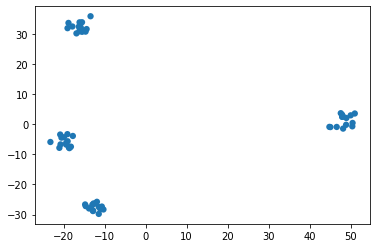

In [9]:
pca = PCA(n_components=2, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(X).transform(X) #X_transformed -- ndarray объектов, где каждый объект описывается двумя ГК
plt.scatter(X_transformed[:101, 0], X_transformed[:101, 1], edgecolor='none', s=40,cmap='winter')